In [1]:
import numpy as numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

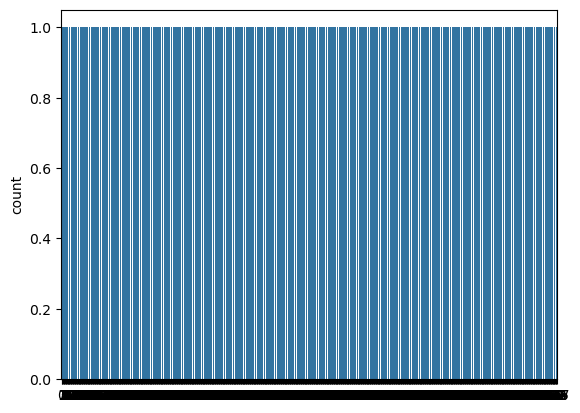

In [9]:
sns.countplot(data["Outcome"])
plt.show()

In [26]:
#Split data into feature (X) and target (y)
X=data.drop('Outcome',axis=1) # Feature
y=data['Outcome'] # Target --> 1 = diabetes, 0 = Nondiabetes

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [25]:
# Initializing the object of Naivebayes classifier
nb_model = GaussianNB()

In [28]:
# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

In [29]:
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

In [31]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       401
           1       0.66      0.58      0.62       213

    accuracy                           0.75       614
   macro avg       0.73      0.71      0.72       614
weighted avg       0.75      0.75      0.75       614



In [32]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



#### Text Classification ####

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
 # Sample dataset: text and labels (spam or ham) 
texts = [ 
    "Free money now!!!", "Hey, are we still meeting tomorrow?", "Congratulations! You've won a free gift card!", "Reminder about your appointment next week", "Urgent! Reply to claim your prize!", "Let's catch up later tonight.", "Exclusive offer for you!", "This is not a spam message.",
] 

# Corresponding labels: 1 for spam, 0 for ham 

labels = [1, 0, 1, 0, 1, 0, 1, 0]

In [38]:
Vectorizer = CountVectorizer()
x = Vectorizer.fit_transform(texts) 

In [42]:
#pd.set_option("display.max_columns",None)
#cols=Vectorizer.get_feature_names()
#pd.DataFrame(x.toarray(),columns=cols)

pd.set_option("display.max_columns", None)
cols = Vectorizer.get_feature_names_out()  # Use get_feature_names_out instead of get_feature_names
pd.DataFrame(x.toarray(), columns=cols)


,about,appointment,are,card,catch,claim,congratulations,exclusive,for,free,gift,hey,is,later,let,meeting,message,money,next,not,now,offer,prize,reminder,reply,spam,still,this,to,tomorrow,tonight,up,urgent,ve,we,week,won,you,your
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.2, random_state=42)

In [44]:
nb_classifier = MultinomialNB()

In [45]:
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [46]:
y_pred_train = nb_classifier.predict(x_train)
y_pred_test = nb_classifier.predict(x_test)

In [47]:
# Evaluate the model's performance
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy_train:2f}')

Accuracy: 1.000000


In [48]:
# Evaluate the model's performance
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy_test:2f}')

Accuracy: 1.000000
